<h2 style="color:blue" align="Left"> Logistic Regression - Multiclass Classification (Iris) </h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

<h2 style="color:purple"> 1.0 Load Data </h2>

In [3]:
def load_data (file_path):
    df = pd.read_csv(file_path)
    
    return df
file_path = "E:/M60/ml_dataset/Iris.csv"
df = load_data(file_path)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Need to unique valus of dependent variable
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df['Species'].value_counts() # its a balanced dataset

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
# Lets convert texual to numeric by replace method
df['Species'] = df['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2,'Iris-virginica':3 })
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


<h2 style="color:purple"> 2.0 Train Test </h2>

We could seperate X, y as well

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],
                                                   df['Species'], test_size = 0.3, random_state=42
                                                   )


In [15]:
print(len(X_train))
print(len(X_test))

105
45


<h2 style="color:purple"> 3.0 Model </h2>

In [16]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
model.predict(X_test)

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1,
       1], dtype=int64)

In [20]:
model.score(X_test, y_test)

1.0

<h2 style="color:purple"> 4.0 Evaluation </h2>

In [21]:
predicted_output = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

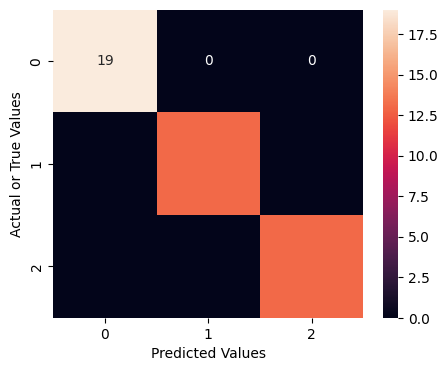

In [24]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual or True Values')
plt.show() 

<h2 style="color:purple"> 5.0 Classfication Report </h2>

In [29]:
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(y_test, predicted_output)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test, predicted_output)
print(report)

Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

